In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

## Recommendation Systems.
There are three main types of recommendation systems:
* **Content-based filtering** - looks at the item and recommends similar items eg action movie(Jumanji) then the recommendation can be a similar action movie (Tomb Raider)
* **Collaborative filtering** - looks at who liked what, then suggests these items.
* **Hybrid Models** - combines both for more nuanced recommendations.(Amazon, Netflix & Google Ads)

We'll start by looking at `content-based filtering` using cosine similarity on the movielens dataset.

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
#load the movie and genres dataset

items = ["movie_id", "movie title", "release date", "video_release_date",
            "IMDb URL", "unknown", "action", 'adventure', "animation",
              "children's", "comedy", "crime", "documentary", "drama", "fantasy",
              "Film-Noir", "horror", "musical", "mystery", "romance", "Sci-Fi",
              "thriller", "war", "western"]

movies = pd.read_csv('./data/mlk/u.item', sep="|", names=items, encoding='latin-1')
movies

,movie_id,movie title,release date,video_release_date,IMDb URL,unknown,action,adventure,animation,children's,...,fantasy,Film-Noir,horror,musical,mystery,romance,Sci-Fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(movies):
    # Drop column: 'unknown'
    movies = movies.drop(columns=['unknown'])
    return movies

movies_clean = clean_data(movies.copy())
movies_clean.head()

,movie_id,movie title,release date,video_release_date,IMDb URL,action,adventure,animation,children's,comedy,...,fantasy,Film-Noir,horror,musical,mystery,romance,Sci-Fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


We'll do a bit of cleaning by removing column with the most null entries.

In [9]:
movies = movies.drop(['video_release_date','IMDb URL'], axis=1)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      1682 non-null   int64 
 1   movie title   1682 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1682 non-null   int64 
 4   action        1682 non-null   int64 
 5   adventure     1682 non-null   int64 
 6   animation     1682 non-null   int64 
 7   children's    1682 non-null   int64 
 8   comedy        1682 non-null   int64 
 9   crime         1682 non-null   int64 
 10  documentary   1682 non-null   int64 
 11  drama         1682 non-null   int64 
 12  fantasy       1682 non-null   int64 
 13  Film-Noir     1682 non-null   int64 
 14  horror        1682 non-null   int64 
 15  musical       1682 non-null   int64 
 16  mystery       1682 non-null   int64 
 17  romance       1682 non-null   int64 
 18  Sci-Fi        1682 non-null   int64 
 19  thrill

In [10]:
movies.head()

,movie_id,movie title,release date,unknown,action,adventure,animation,children's,comedy,crime,...,fantasy,Film-Noir,horror,musical,mystery,romance,Sci-Fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


The columns seem to be one-hot encoded so lets create vectors to represent each movie. Then use these vectors in the cosine similarity function to get recommendations.

In [11]:
genres = [ "unknown", "action", 'adventure', "animation",
              "children's", "comedy", "crime", "documentary", "drama", "fantasy",
              "Film-Noir", "horror", "musical", "mystery", "romance", "Sci-Fi",
              "thriller", "war", "western"]

genre_features = movies[genres]

genre_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   unknown      1682 non-null   int64
 1   action       1682 non-null   int64
 2   adventure    1682 non-null   int64
 3   animation    1682 non-null   int64
 4   children's   1682 non-null   int64
 5   comedy       1682 non-null   int64
 6   crime        1682 non-null   int64
 7   documentary  1682 non-null   int64
 8   drama        1682 non-null   int64
 9   fantasy      1682 non-null   int64
 10  Film-Noir    1682 non-null   int64
 11  horror       1682 non-null   int64
 12  musical      1682 non-null   int64
 13  mystery      1682 non-null   int64
 14  romance      1682 non-null   int64
 15  Sci-Fi       1682 non-null   int64
 16  thriller     1682 non-null   int64
 17  war          1682 non-null   int64
 18  western      1682 non-null   int64
dtypes: int64(19)
memory usage: 249.8 KB


## Cosine Similarity
Instead of using angles directly, cosine similarity gives us a score between -1 and 1.
* 1 = items are identical in terms of direction
* 0 = they are completely different
* -1 = opposite direction

We will use these values to compare movies based on ttheir genre vectors.

In [13]:
#get the matrix to use within our function.
cosine_matrix = cosine_similarity(genre_features)

#displaying similarity of first movie with others
cosine_matrix[5][:15]
# cosine_matrix

array([0.        , 0.        , 0.        , 0.57735027, 0.57735027,
       1.        , 0.70710678, 0.57735027, 1.        , 0.70710678,
       0.        , 0.        , 0.        , 0.70710678, 1.        ])

In [9]:
movies.head(10)

,movie_id,movie title,release date,unknown,action,adventure,animation,children's,comedy,crime,...,fantasy,Film-Noir,horror,musical,mystery,romance,Sci-Fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Next, lets define a function that will take a movie title as an input, use the list from the cosine matrix to sort similar movies then return a list of top 5 movies as the output.

In [14]:
def movie_recommendation(movie_title, n=5):
    movie_index = movies[movies['movie title'] == movie_title].index[0]

    scores = list(enumerate(cosine_matrix[movie_index]))

    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

    #return the scores ommitting the first movie and adding the 6th one to make five 
    return_scores = sorted_scores[1: n+1]
    #get movie indices and names
    movie_indices = [i[0] for i in return_scores]

    return movies['movie title'].iloc[movie_indices]



movie_recommendation("Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)")

8       Dead Man Walking (1995)
14    Mr. Holland's Opus (1995)
17    White Balloon, The (1995)
18        Antonia's Line (1995)
29         Belle de jour (1967)
Name: movie title, dtype: object

In [16]:
movie_recommendation('Dead Man Walking (1995)')

8       Dead Man Walking (1995)
14    Mr. Holland's Opus (1995)
17    White Balloon, The (1995)
18        Antonia's Line (1995)
29         Belle de jour (1967)
Name: movie title, dtype: object

In [12]:
movies.tail(12)

,movie_id,movie title,release date,unknown,action,adventure,animation,children's,comedy,crime,...,fantasy,Film-Noir,horror,musical,mystery,romance,Sci-Fi,thriller,war,western
1670,1671,"Further Gesture, A (1996)",20-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1671,1672,Kika (1993),01-Jan-1993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1672,1673,Mirage (1995),01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1673,1674,Mamma Roma (1962),01-Jan-1962,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1674,1675,"Sunchaser, The (1996)",25-Oct-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1675,1676,"War at Home, The (1996)",01-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1676,1677,Sweet Nothing (1995),20-Sep-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1678,Mat' i syn (1997),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Improve on the function to make sure it doesn't return the movie title parsed into it.

In [18]:
def improved_movie_recommendation(movie_title, n=5):
    movie_index = movies[movies['movie title'] == movie_title].index[0]

    scores = list(enumerate(cosine_matrix[movie_index]))

    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

    #make a list without the parsed in movie_title using the movie_id
    return_scores = []
    for score in sorted_scores:
        index = score[0]
        if index != movie_index:
            return_scores.append(score)
    #to break out of this loop
        if len(return_scores) == n:
            break

    movie_indices = [i[0] for i in return_scores]

    return movies['movie title'].iloc[movie_indices]


movie_recommendation('Dead Man Walking (1995)')

8       Dead Man Walking (1995)
14    Mr. Holland's Opus (1995)
17    White Balloon, The (1995)
18        Antonia's Line (1995)
29         Belle de jour (1967)
Name: movie title, dtype: object

In [19]:
# movie_recommendation('B. Monkey (1998)')
improved_movie_recommendation('Dead Man Walking (1995)')

5     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
14                            Mr. Holland's Opus (1995)
17                            White Balloon, The (1995)
18                                Antonia's Line (1995)
29                                 Belle de jour (1967)
Name: movie title, dtype: object

In [15]:
improved_movie_recommendation('B. Monkey (1998)')

606                         Rebecca (1940)
885           Life Less Ordinary, A (1997)
32                        Desperado (1995)
67                        Crow, The (1994)
89     So I Married an Axe Murderer (1993)
Name: movie title, dtype: object

In [16]:
improved_movie_recommendation('Dead Man Walking (1995)')


5     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
14                            Mr. Holland's Opus (1995)
17                            White Balloon, The (1995)
18                                Antonia's Line (1995)
29                                 Belle de jour (1967)
Name: movie title, dtype: object

In [17]:
movie_recommendation('Dead Man Walking (1995)')


8       Dead Man Walking (1995)
14    Mr. Holland's Opus (1995)
17    White Balloon, The (1995)
18        Antonia's Line (1995)
29         Belle de jour (1967)
Name: movie title, dtype: object

### Collaborative Filtering
We have seen an example of content-based filtering, now as you might have guessed its not a reliable system, just because two items are similar doesn't mean that the user will like it. 

So comes in collaborative filtering where we'll be looking at user preferences and recommending based on that. 

Collaborative Filtering (CF) is currently the most widely used approach to build recommendation systems and uses the users’ behavior in the form of user-item ratings for predictions.

In [ ]:
""" 
          Sleepy Hollow  |      Dead-Pool     |     Madagascar |        Dodge 
Jacob           5                   3                   -                  2
Martha          4                   0                   -                  1
Tony            1                   1                   -                  5

john            5                   4                   -                  1

"""


# [5, 3, 0, 2],             |
# [4, 0, 0, 1],             |           user_item_matrix
# [1, 1, 0, 5]              |

# 25 + y = 12


# user_item_matrix =  latent features(user preferences) * weight/importance of each latent feature * a way to get back to the original matrix

##  user_item_matrix = U * S * V^t


' \n          Sleepy Hollow  |      Dead-Pool     |     Madagascar |        Dodge \nJacob           5                   3                   0                  2\nMartha          4                   0                   0                  1\nTony            1                   1                   0                  5\n'

SVD breaksdown this matrix into three parts:
- `U` -  users' relationship to the hidden pattern/latent factors/hidden features.
- `S` - this one contains the weight/strengh of each dimension.
- `V^t` - captures how each item maps to these same dimensions.

rating_matrix = U * S * V^t   ### SVD



In [36]:
import numpy as np
from numpy.linalg import svd


ratings = np.array([
    [5, 3, 0, 2],
    [4, 0, 0, 1],
    [1, 1, 0, 5]
])


u, s, vt = svd(ratings)




In [21]:
ratings.shape

(3, 4)

In [26]:
u.shape

(3, 3)

In [30]:
print(f'{u.shape}, {s.shape}, {vt.shape}')

(3, 3), (3,), (4, 4)


In [38]:

diag_s = np.diag(s)
print(f'{s.shape}, {diag_s.shape}')
s

(3,), (3, 3)


array([7.93906308, 4.01213138, 1.69531093])

In [39]:
diag_s

array([[7.93906308, 0.        , 0.        ],
       [0.        , 4.01213138, 0.        ],
       [0.        , 0.        , 1.69531093]])

In [40]:
padded_s = np.pad(diag_s, ((0, 0), (0, 1)), mode='constant')

# np.dot(u, np.dot(s, vt))
padded_s.shape

(3, 4)

In [41]:
padded_s

array([[7.93906308, 0.        , 0.        , 0.        ],
       [0.        , 4.01213138, 0.        , 0.        ],
       [0.        , 0.        , 1.69531093, 0.        ]])

In [28]:
vt

""" 
(3, 3), (4, 3)
"""

array([[ 0.75995806,  0.34372789,  0.        ,  0.55164743],
       [ 0.57582402,  0.03762417,  0.        , -0.81670749],
       [-0.30148041,  0.93831528,  0.        , -0.16933398],
       [ 0.        ,  0.        , -1.        ,  0.        ]])

In [43]:
# combined the padded weights matrix and mapping matrix
combined = np.dot(padded_s, vt)

combined.shape

(3, 4)

In [45]:
np.dot(u, combined)

array([[5., 3., 0., 2.],
       [4., 0., 0., 1.],
       [1., 1., 0., 5.]])

In [24]:
movie_ratings = pd.read_csv('./data/mlk/u.data', sep="\t", names=['user_id', 'movie_id', 'ratings', 'timestampt'])

movie_ratings_copy = movie_ratings.copy()
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   user_id     100000 non-null  int64
 1   movie_id    100000 non-null  int64
 2   ratings     100000 non-null  int64
 3   timestampt  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [25]:
movie_ratings['ratings'].unique()

array([3, 1, 2, 4, 5], dtype=int64)

In [26]:
# !pip install scikit-surprise
from surprise import SVD, Dataset, accuracy, Reader
from surprise.model_selection import train_test_split


#get ratings to surprise format
reader = Reader(rating_scale=(1, 5))

#load the data into surprise format
data = Dataset.load_from_df(movie_ratings[['user_id', 'movie_id', 'ratings']], reader)


In [27]:
#split data
train_set, test_set = train_test_split(data, test_size=0.3, random_state=21)

#initiate model
svd_model = SVD()


In [28]:
#modelling 
svd_model.fit(train_set)

#prediction and evaluation
svd_ratings = svd_model.test(test_set)

#rmse & mae
rsme = accuracy.rmse(svd_ratings)
mae = accuracy.mae(svd_ratings)

RMSE: 0.9422
MAE:  0.7431


### ALS
Alternating Least Squares works well with binary formats.

rating_matrix = U * J^t   ###  ALS

In [29]:
# !pip install implicit
import implicit
from sklearn.model_selection import train_test_split
# from surprise.model_selection import train_test_split

# specify a rating
movie_ratings['ratings'] = (movie_ratings['ratings'] >= 3).astype(int)

movie_ratings['user_id'] = movie_ratings['user_id'].astype('category').cat.codes

movie_ratings['movie_id'] = movie_ratings['movie_id'].astype('category').cat.codes

#split dataset and make sure that all user are represented in both sets
train_set_als, test_set_als = train_test_split(movie_ratings, test_size=0.2, random_state=42, stratify=movie_ratings['user_id'])


train_set_als.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 80618 to 67324
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     80000 non-null  int16
 1   movie_id    80000 non-null  int16
 2   ratings     80000 non-null  int32
 3   timestampt  80000 non-null  int64
dtypes: int16(2), int32(1), int64(1)
memory usage: 1.8 MB


c:\Users\marwa\miniconda3\envs\xBase\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
users = movie_ratings['user_id'].nunique()
movies = movie_ratings['movie_id'].nunique()

In [31]:
#create a sparse matrix for both train and test
from scipy.sparse import csr_matrix

train_sparse = csr_matrix((train_set_als['ratings'], (train_set_als['user_id'], train_set_als['movie_id'])), shape=(users, movies))
test_sparse = csr_matrix((test_set_als['ratings'], (test_set_als['user_id'], test_set_als['movie_id'])), shape=(users, movies))

In [32]:
model = implicit.als.AlternatingLeastSquares(random_state=42)

model.fit(train_sparse)

100%|██████████| 15/15 [00:00<00:00, 18.75it/s]


In [33]:
from implicit.als import AlternatingLeastSquares

model = AlternatingLeastSquares(random_state=42)

model.fit(train_sparse)

100%|██████████| 15/15 [00:00<00:00, 18.00it/s]


In [34]:

values = []
predicted_ratings = []

for user, item, pred_rating in zip(test_set_als['user_id'], test_set_als['movie_id'], test_set_als['ratings']):
    if user < model.user_factors.shape[0] and item < model.item_factors.shape[0]:
        user_v = model.user_factors[user]
        item_v = model.item_factors[item]

        
        values.append(np.dot(user_v, item_v))
        predicted_ratings.append(pred_rating)

    else:
        pass


###create a logic to get movie names



model.recommend(25, train_sparse[25], 5)

(array([750, 280, 247, 116, 284]),
 array([0.5000793 , 0.4959383 , 0.45313233, 0.4440935 , 0.44021663],
       dtype=float32))

In [35]:
##------------------------------------------------###

## Clustering
Clustering is an unsupervised learning technique where the goal is to group data points into groups(clusters), based on some similarity measure(eg. distance(euclidean distance)) while keeping the groups as different as possible.

#### 1. K-means Clustering



#### 2. Hierarchical Clustering

In [36]:
""" 
6 A
6 O
6 P
6 M     

4 fruits

FRUITS AND WEIGHTS

Weights to calculate the distance:

cluster 1       | cluster 2         | cluster 3          | cluster 4
    A                   A                   A                   A
    a
    a

"""

' \n6 A\n6 O\n6 P\n6 M     \n\n4 fruits\n\nFRUITS AND WEIGHTS\n\nWeights to calculate the distance:\n\ncluster 1       | cluster 2         | cluster 3          | cluster 4\n    A                   A                   A                   A\n    a\n    a\n\n'

In [37]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   user_id     100000 non-null  int16
 1   movie_id    100000 non-null  int16
 2   ratings     100000 non-null  int32
 3   timestampt  100000 non-null  int64
dtypes: int16(2), int32(1), int64(1)
memory usage: 1.5 MB


In [38]:
#k-means clustering

# movie_ratings  ## ratings dataset

#create a pivot table
pivot_table = movie_ratings.pivot_table(index='user_id', columns='movie_id', values='ratings').fillna(value=0)

pivot_table.head()


movie_id,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.cluster import KMeans
import seaborn as sns

pivot_table_kmeans1 = pivot_table.copy()
#instatiate kmeans
kmeans = KMeans(n_clusters=5, random_state=21)
clusters = kmeans.fit_predict(pivot_table_kmeans1)


pivot_table_kmeans1['cluster'] = clusters

# plt.figure(figsize=(10, 8))
# sns.scatterplot(data=pivot_table, hue='cluster')
# # plt.title()
# plt.show()

### Elbow Point Technique
The elbow method helps us plot a range of k and the inertia(sum of squared errors) against the k. The elbow point  on the graph represents the optimum number of clusters to use.

c:\Users\marwa\miniconda3\envs\xBase\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (66) found smaller than n_clusters (67). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\marwa\miniconda3\envs\xBase\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (66) found smaller than n_clusters (68). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\marwa\miniconda3\envs\xBase\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (66) found smaller than n_clusters (69). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\marwa\miniconda3\envs\xBase\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (66) found smaller than n_clusters (70). Possibly due to duplicate points in X.
  return fit_method(estimator, *args

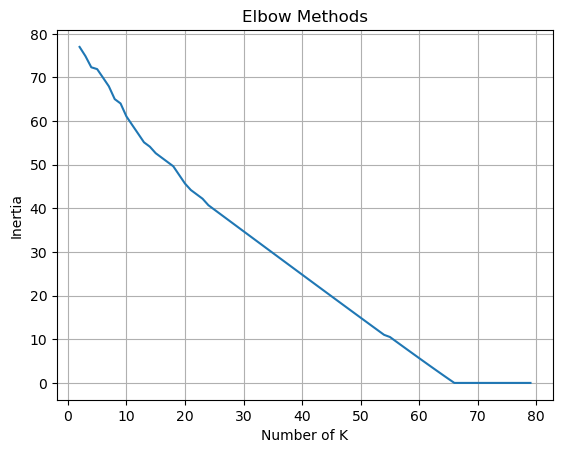

In [40]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

movie_ratings_sample = movie_ratings.head(100)


pivot_table_kmeans = movie_ratings_sample.pivot_table(index='user_id', columns='movie_id', values='ratings').fillna(value=0)

#list to hold inertia
inertia = []
K_ranges = range(2, 80)


for k in K_ranges:
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(pivot_table_kmeans)
    inertia.append(kmeans.inertia_)

plt.plot(K_ranges, inertia)
plt.title('Elbow Methods')
plt.xlabel('Number of K')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [41]:
###hierarchial
from sklearn.cluster import AgglomerativeClustering

pivot_table_agg = pivot_table.copy()

#instantiate model
agglomerative = AgglomerativeClustering(n_clusters=10)
agglo_clusters = agglomerative.fit_predict(pivot_table_agg)

pivot_table_agg['agglo_clusters'] = agglo_clusters



pivot_table_agg.head()

movie_id,0,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,agglo_clusters
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [42]:
pivot_table_agg['agglo_clusters'].value_counts()

agglo_clusters
8    255
1    173
7    168
2     84
5     75
0     62
3     49
6     35
4     29
9     13
Name: count, dtype: int64

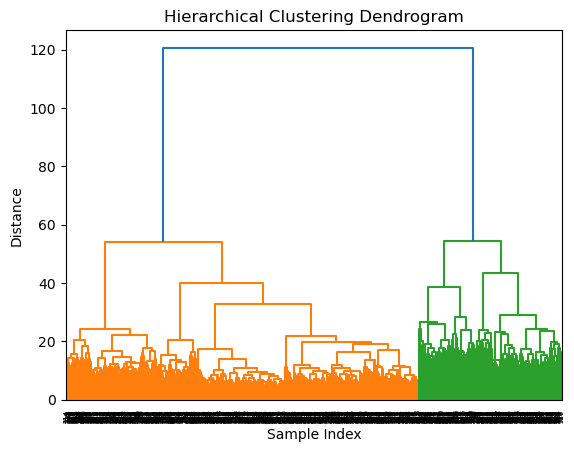

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(pivot_table, method='ward')
plt.Figure(figsize=(15, 12))

dendrogram(Z)


# dendrogram(Z)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [59]:
# sns.scatterplot(pivot_table_agg)
# plt.show()
movie_ratings

NameError: name 'movie_ratings' is not defined

### Visualizations in Recommendation Systems
1. Elbow Point - help us in determining the best value to use as `k` in K-means clustering
2. Dendograms
3. PCA
4. Silhoutte Plot

In [45]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   user_id     100000 non-null  int16
 1   movie_id    100000 non-null  int16
 2   ratings     100000 non-null  int32
 3   timestampt  100000 non-null  int64
dtypes: int16(2), int32(1), int64(1)
memory usage: 1.5 MB


### Principal Component Analysis.
PCA is used to reduce the number of latent features when working with matrices.


In [82]:
from sklearn.decomposition import PCA


""" 
options:
1. Any number between 0.1 and 0.99 automatically selects the number of principal components that will fit that 
    variance

2. Any number above 1(>=1) allows you to manually select the principal components you want.
"""
#initialize pca
pca = PCA(n_components=0.90, random_state=42) #you want components that account for 90% of the variance

pca_1 = PCA(n_components=5) #any number above 1 specifies the number of Principal components you want

In [64]:
pivot_table_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 942
Columns: 1683 entries, 0 to agglo_clusters
dtypes: float64(1682), int64(1)
memory usage: 12.1 MB


In [72]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   user_id     100000 non-null  int16
 1   movie_id    100000 non-null  int16
 2   ratings     100000 non-null  int32
 3   timestampt  100000 non-null  int64
dtypes: int16(2), int32(1), int64(1)
memory usage: 1.5 MB


In [83]:
##subset of data
top_users = movie_ratings['user_id'].value_counts().head(100).index
ratings_subset = movie_ratings[movie_ratings['user_id'].isin(top_users)]


new_matrix = ratings_subset.pivot_table(index='user_id', columns='movie_id', values='ratings').fillna(0)
new_matrix


#apply pca to get components that account for 90% of the variance.
reduced_data = pca.fit_transform(new_matrix)

#apply pca to get 5 principal components
reduced_data_1 = pca_1.fit_transform(new_matrix)

In [58]:
from sklearn.decomposition import PCA
u

pca_u = PCA(n_components=1)

transformed_ratings = pca_u.fit_transform(ratings)


U, S, VT = svd(transformed_ratings)

print(f'{U.shape}, {S.shape}, {VT.shape}')

(3, 3), (1,), (1, 1)


In [91]:
#initialize agglomerative clustering algorithm
agglomerative = AgglomerativeClustering()

#created clusters
agglo_cluster = agglomerative.fit_predict(new_matrix)  ##data one goes with all the latent features

agglo_clusters = agglomerative.fit_predict(reduced_data) ##data two goes with features that account of 90% variance

agglo_clusters_1 = agglomerative.fit_predict(reduced_data_1) ## data three with 5 principal components

# new_matrix['agglo_clusters'] = agglo_clusters



C:\Users\marwa\AppData\Local\Temp\ipykernel_14028\1371773202.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


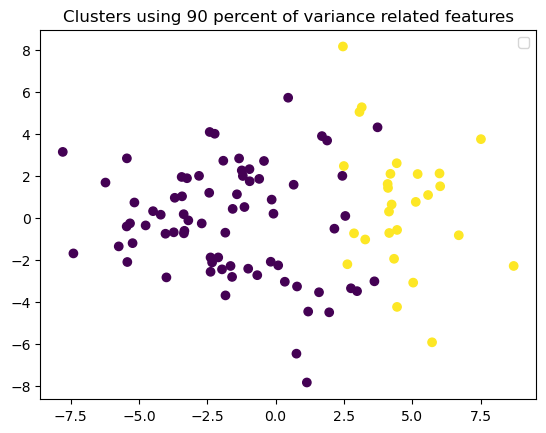

In [92]:
##
plt.scatter(reduced_data[:, 0],reduced_data[:, 1], c=agglo_clusters)
plt.title("Clusters using 90 percent of variance related features")
plt.legend()
plt.show()

C:\Users\marwa\AppData\Local\Temp\ipykernel_14028\104824704.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


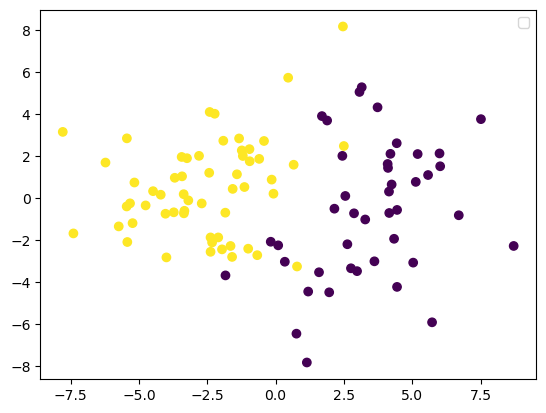

In [94]:

plt.scatter(reduced_data_1[:, 0],reduced_data_1[:, 1], c=agglo_clusters_1)
plt.legend()
plt.show()

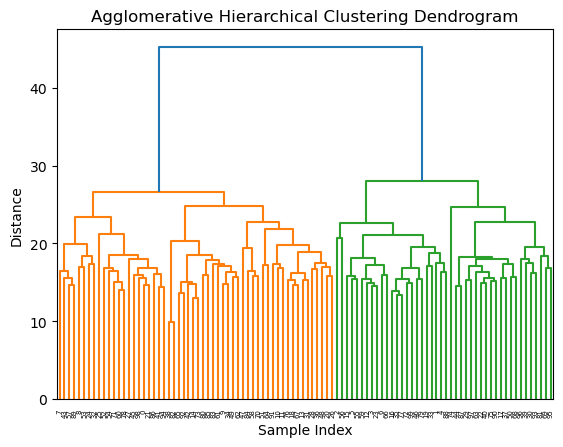

In [75]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(new_matrix, method='ward')
plt.Figure(figsize=(15, 12))

dendrogram(Z)


# dendrogram(Z)

plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [100]:
from sklearn.datasets import load_iris

In [96]:
import seaborn as sns
iris_df = sns.load_dataset('iris')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


C:\Users\marwa\AppData\Local\Temp\ipykernel_14028\2058034644.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


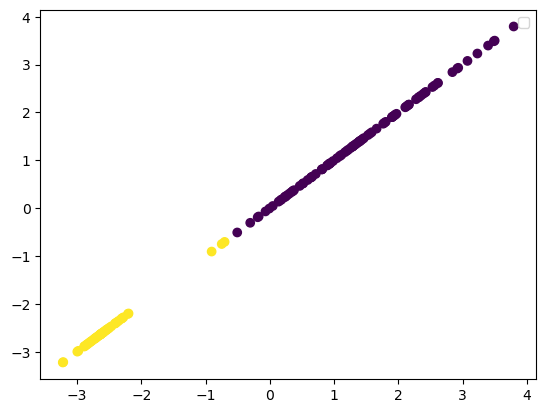

In [105]:
# pca & pca_1


# x = iris_df.drop('species', axis=1)

iris = load_iris()

x = iris.data

x_reduced = pca.fit_transform(x)

x_reduced.shape
#km = 5
#kmeans = 2
km = KMeans(n_clusters=5, random_state=42)

km_clusters = km.fit_predict(x_reduced)

kmeans_clusters = kmeans.fit_predict(x_reduced)




plt.scatter(x_reduced[:, 0],x_reduced[:, 0], c=kmeans_clusters)
plt.legend()
plt.show()

In [104]:
x_reduced.shape

(150, 1)

In [62]:
# from PIL import Image
# from glob import glob


# img_path = glob(os.path.join())

C:\Users\marwa\AppData\Local\Temp\ipykernel_14028\981333854.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


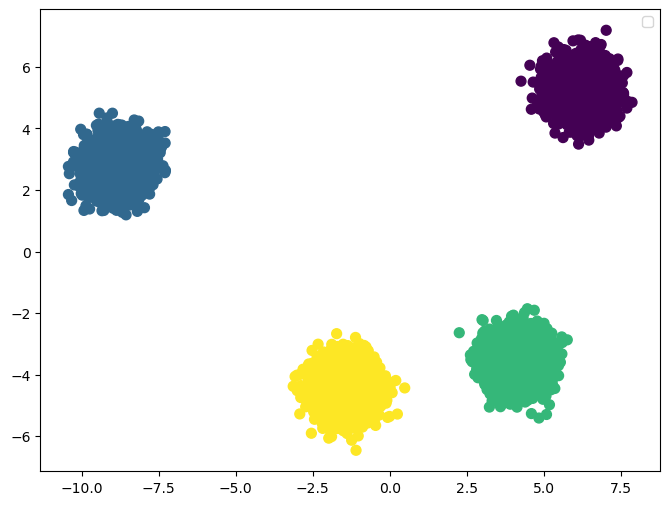

In [112]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=10000, centers=4, cluster_std=0.5, random_state=21)

#90% variance
X_pca = pca.fit_transform(X)

# X_pca_1 = pca_1.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50)
plt.legend()
plt.show()


In [113]:
###silhoutte plot
from sklearn.metrics import silhouette_score, silhouette_samples


""" 
get silhoutte scores and samples
plot scores against samples
"""

scores = silhouette_score(X, y_kmeans)
sil_samples = silhouette_samples(X, y_kmeans)


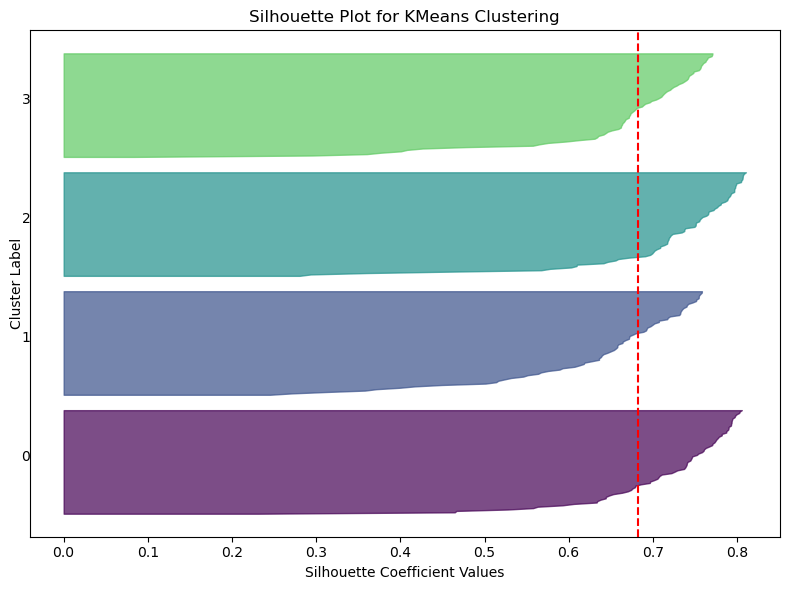

Average silhouette score: 0.682


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

silhouette_avg = silhouette_score(X_pca, cluster_labels)
sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

fig, ax1 = plt.subplots(figsize=(8, 6))
y_lower = 10 

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10 

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_title("Silhouette Plot for KMeans Clustering")
ax1.set_xlabel("Silhouette Coefficient Values")
ax1.set_ylabel("Cluster Label")
ax1.set_yticks([])  
plt.tight_layout()
plt.show()

print(f"Average silhouette score: {silhouette_avg:.3f}")
